In [2]:
import json
import os

# Layer 12

In [3]:
def load_files_with_specific_path(root_dir):
    results_dict = {}

    # Walking through the directory structure
    for root, dirs, files in os.walk(root_dir):
        # Check if 'gptj-final' is in the path
        if 'gptj-final2' not in root:
            continue
    
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                x = root.split('/')[-2]  # Extract 'x' from the path
                y = os.path.splitext(file)[0]  # Extract 'y' from the file name
                # Extract number from 'y'
                y = y.split('_')[-1]

                # Load JSON data
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                # Adding to dictionary
                if x not in results_dict:
                    results_dict[x] = {}
                results_dict[x][y] = data

    return results_dict

loaded_data_specific_path = load_files_with_specific_path("results/")
loaded_data_specific_path  # Displaying the loaded data structure



{'antonym': {'7410': {'12': {'original': {'clean_topk': [[1,
       0.016181229773462782],
      [2, 0.12297734627831715],
      [3, 0.17475728155339806]],
     'clean_rank_list': [2,
      1,
      1,
      12,
      258,
      11,
      18,
      944,
      11,
      6,
      1,
      21,
      23,
      264,
      75,
      7,
      137,
      40,
      1,
      23,
      3991,
      4,
      5,
      6,
      1153,
      11,
      10,
      40,
      2,
      15,
      6,
      39,
      113,
      2,
      47,
      1,
      312,
      6,
      51,
      3,
      3,
      14,
      28,
      78,
      77,
      1,
      40,
      6,
      6076,
      75,
      276,
      4,
      2,
      0,
      45,
      38,
      1,
      13,
      32,
      61,
      21,
      6,
      2,
      488,
      62,
      13,
      122,
      7,
      1,
      125,
      221,
      5,
      4,
      541,
      2,
      1,
      3,
      65,
      1,
      199,
      14,
      12,
      256,
      3,

In [4]:
loaded_data_specific_path['antonym']['7410']['12']['centred']['intervention_topk'][0][1]

0.2815533980582524

In [5]:
original_accuracies = {task: {} for task in loaded_data_specific_path.keys()}
new_accuracies = {task: {} for task in loaded_data_specific_path.keys()}

for task in loaded_data_specific_path.keys():
    for seed in loaded_data_specific_path[task].keys():
        original_accuracies[task][seed] = loaded_data_specific_path[task][seed]['12']['original']['intervention_topk'][0][1]
        new_accuracies[task][seed] = loaded_data_specific_path[task][seed]['12']['centred']['intervention_topk'][0][1]


In [6]:
original_accuracies

{'antonym': {'7410': 0.20711974110032363,
  '3530': 0.25,
  '6956': 0.20382165605095542,
  '5791': 0.22039473684210525,
  '22083': 0.21671826625386997},
 'capitalize': {'69599': 0.029585798816568046,
  '30185': 0.023529411764705882,
  '31623': 0.011834319526627219,
  '23184': 0.05917159763313609,
  '10597': 0.04142011834319527},
 'present-past': {'76913': 0.0,
  '3986': 0.05084745762711865,
  '74601': 0.05,
  '20235': 0.03389830508474576,
  '19693': 0.016666666666666666},
 'singular-plural': {'31251': 0.19047619047619047,
  '74540': 0.20930232558139536,
  '21174': 0.38095238095238093,
  '9677': 0.20930232558139536,
  '74311': 0.32558139534883723},
 'country-capital': {'54689': 0.23809523809523808,
  '47788': 0.15,
  '24927': 0.125,
  '57063': 0.16666666666666666,
  '84201': 0.175},
 'english-french': {'78870': 0.02340702210663199,
  '186': 0.030303030303030304,
  '29523': 0.024390243902439025,
  '2159': 0.02913907284768212,
  '46973': 0.028720626631853787}}

In [22]:
new_accuracies

{'antonym': {'7410': 0.2815533980582524,
  '3530': 0.2875,
  '6956': 0.24203821656050956,
  '5791': 0.27631578947368424,
  '22083': 0.28173374613003094,
  'mean': 0.2738282300444954},
 'capitalize': {'69599': 0.05325443786982249,
  '30185': 0.047058823529411764,
  '31623': 0.029585798816568046,
  '23184': 0.07692307692307693,
  '10597': 0.05325443786982249,
  'mean': 0.052015315001740337},
 'present-past': {'76913': 0.0,
  '3986': 0.03389830508474576,
  '74601': 0.03333333333333333,
  '20235': 0.03389830508474576,
  '19693': 0.016666666666666666,
  'mean': 0.023559322033898305},
 'singular-plural': {'31251': 0.19047619047619047,
  '74540': 0.20930232558139536,
  '21174': 0.38095238095238093,
  '9677': 0.23255813953488372,
  '74311': 0.3023255813953488,
  'mean': 0.2631229235880399},
 'country-capital': {'54689': 0.47619047619047616,
  '47788': 0.575,
  '24927': 0.6,
  '57063': 0.5238095238095238,
  '84201': 0.45,
  'mean': 0.525},
 'english-french': {'78870': 0.1469440832249675,
  '186

In [7]:
import numpy as np
# add means to each
for task in original_accuracies.keys():
    original_accuracies[task]['mean'] = np.mean(list(original_accuracies[task].values()))
    new_accuracies[task]['mean'] = np.mean(list(new_accuracies[task].values()))

In [8]:
# Average over means for both
original_accuracies['mean'] = np.mean(list(original_accuracies[task]['mean'] for task in original_accuracies.keys()))
new_accuracies['mean'] = np.mean(list(new_accuracies[task]['mean'] for task in new_accuracies.keys()))

In [9]:
original_accuracies['mean']

0.124044819806792

In [10]:
new_accuracies['mean']

0.2159357394172771

# Repeating for layer 9

In [23]:
def load_files_with_specific_path_9(root_dir):
    results_dict = {}

    # Walking through the directory structure
    for root, dirs, files in os.walk(root_dir):
        # Check if 'gptj-final' is in the path
        # Split root, get the last element, and check if it is 'gptj-final'
        root_split = root.split('/')[-1]
        print(root_split)
        if 'gptj-final' != root_split:
            continue
    
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                x = root.split('/')[-2]  # Extract 'x' from the path
                y = os.path.splitext(file)[0]  # Extract 'y' from the file name
                # Extract number from 'y'
                y = y.split('_')[-1]

                # Load JSON data
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                # Adding to dictionary
                if x not in results_dict:
                    results_dict[x] = {}
                results_dict[x][y] = data

    return results_dict

loaded_data_specific_path_9 = load_files_with_specific_path_9("results/")
loaded_data_specific_path_9  # Displaying the loaded data structure




antonym
22_11_2023_15_55_27
28_11_2023_16_45_14
28_11_2023_16_51_40
28_11_2023_16_59_44
28_11_2023_17_14_08
28_11_2023_18_30_44
gptj-final
28_11_2023_21_02_39
gptj-final2
29_11_2023_00_06_27
gptj-final3
llama7B
capitalize
28_11_2023_18_48_22
gptj-final
gptj-final2
gptj-final3
llama7B
cosine-sims
present-past
21_11_2023_13_39_58
21_11_2023_13_54_30
21_11_2023_14_01_50
21_11_2023_14_07_28
21_11_2023_14_14_49
28_11_2023_19_37_49
gptj-final
gptj-final2
gptj-final3
llama7B
singular-plural
21_11_2023_13_30_48
28_11_2023_19_43_55
gptj-final
gptj-final2
gptj-final3
llama7B
country-capital
28_11_2023_18_58_02
gptj-final
gptj-final2
gptj-final3
llama7B
english-french
28_11_2023_19_04_18
gptj-final
gptj-final2
gptj-final3
llama7B


{'antonym': {'87341': {'9': {'original': {'clean_topk': [[1,
       0.019867549668874173],
      [2, 0.15562913907284767],
      [3, 0.20198675496688742]],
     'clean_rank_list': [1,
      103,
      16,
      1,
      7,
      1400,
      5,
      1,
      27,
      15,
      26,
      10,
      39,
      3315,
      0,
      1,
      2,
      115,
      26,
      49,
      37,
      116,
      1,
      32,
      2084,
      1,
      968,
      376,
      178,
      26,
      11,
      1,
      357,
      1,
      93,
      4489,
      128,
      0,
      62,
      2,
      25,
      288,
      88,
      98,
      15,
      18,
      199,
      23,
      7,
      95,
      67,
      14,
      275,
      0,
      133,
      9,
      108,
      16,
      22,
      44,
      246,
      0,
      32,
      246,
      9,
      31,
      2,
      29,
      8432,
      220,
      46,
      0,
      7,
      317,
      9,
      3,
      40,
      31,
      4,
      11,
      2,
      4,
     

In [24]:
loaded_data_specific_path_9['antonym'].keys()

dict_keys(['87341', '12150', '12992', '87661', '96458'])

In [25]:
loaded_data_specific_path_9['antonym']['87341']['9']['centred']['intervention_topk'][0][1]

0.11258278145695365

In [26]:
original_accuracies_9 = {task: {} for task in loaded_data_specific_path_9.keys()}
new_accuracies_9 = {task: {} for task in loaded_data_specific_path.keys()}

for task in loaded_data_specific_path_9.keys():
    for seed in loaded_data_specific_path_9[task].keys():
        original_accuracies_9[task][seed] = loaded_data_specific_path_9[task][seed]['9']['original']['intervention_topk'][0][1]
        new_accuracies_9[task][seed] = loaded_data_specific_path_9[task][seed]['9']['centred']['intervention_topk'][0][1]


In [27]:
original_accuracies_9

{'antonym': {'87341': 0.17218543046357615,
  '12150': 0.20535714285714285,
  '12992': 0.2111801242236025,
  '87661': 0.17592592592592593,
  '96458': 0.16993464052287582},
 'capitalize': {'13181': 0.0,
  '37830': 0.006024096385542169,
  '38256': 0.005952380952380952,
  '99501': 0.0,
  '7575': 0.0},
 'present-past': {'58139': 0.03508771929824561,
  '88921': 0.01694915254237288,
  '61301': 0.01694915254237288,
  '10017': 0.03333333333333333,
  '63353': 0.03333333333333333},
 'singular-plural': {'67517': 0.18604651162790697,
  '40270': 0.3023255813953488,
  '98668': 0.20930232558139536,
  '99957': 0.11627906976744186,
  '58582': 0.3023255813953488},
 'country-capital': {'12266': 0.175,
  '75625': 0.09523809523809523,
  '69766': 0.12195121951219512,
  '91971': 0.175,
  '33496': 0.0975609756097561},
 'english-french': {'98383': 0.026143790849673203,
  '82890': 0.03880983182406209,
  '50819': 0.017834394904458598,
  '20342': 0.028645833333333332,
  '53712': 0.021739130434782608}}

In [28]:
new_accuracies_9

{'antonym': {'87341': 0.11258278145695365,
  '12150': 0.12202380952380952,
  '12992': 0.12111801242236025,
  '87661': 0.1388888888888889,
  '96458': 0.1111111111111111},
 'capitalize': {'13181': 0.005952380952380952,
  '37830': 0.006024096385542169,
  '38256': 0.005952380952380952,
  '99501': 0.011834319526627219,
  '7575': 0.005952380952380952},
 'present-past': {'58139': 0.03508771929824561,
  '88921': 0.01694915254237288,
  '61301': 0.01694915254237288,
  '10017': 0.03333333333333333,
  '63353': 0.03333333333333333},
 'singular-plural': {'67517': 0.18604651162790697,
  '40270': 0.3023255813953488,
  '98668': 0.20930232558139536,
  '99957': 0.11627906976744186,
  '58582': 0.3023255813953488},
 'country-capital': {'12266': 0.15,
  '75625': 0.09523809523809523,
  '69766': 0.0975609756097561,
  '91971': 0.125,
  '33496': 0.024390243902439025},
 'english-french': {'98383': 0.0457516339869281,
  '82890': 0.054333764553686936,
  '50819': 0.04076433121019108,
  '20342': 0.052083333333333336

In [29]:
import numpy as np
# add means to each
for task in original_accuracies_9.keys():
    original_accuracies_9[task]['mean'] = np.mean(list(original_accuracies_9[task].values()))
    new_accuracies_9[task]['mean'] = np.mean(list(new_accuracies_9[task].values()))

In [30]:
# Average over means for both
original_accuracies_9['mean'] = np.mean(list(original_accuracies_9[task]['mean'] for task in original_accuracies_9.keys()))
new_accuracies_9['mean'] = np.mean(list(new_accuracies_9[task]['mean'] for task in new_accuracies_9.keys()))

In [31]:
original_accuracies_9['mean']

0.09988049246181675

In [32]:
new_accuracies_9['mean']

0.08739908538978436

# Repeat across lots of layers

In [46]:
def load_files_with_specific_path3(root_dir):
    results_dict = {}

    # Walking through the directory structure
    for root, dirs, files in os.walk(root_dir):
        # Check if 'gptj-final' is in the path
        # Split root, get the last element, and check if it is 'gptj-final'
        root_split = root.split('/')[-1]
        print(root_split)
        if 'gptj-final3' != root_split:
            continue
    
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                x = root.split('/')[-2]  # Extract 'x' from the path
                y = os.path.splitext(file)[0]  # Extract 'y' from the file name
                # Extract number from 'y'
                y = y.split('_')[-1]

                # Load JSON data
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                # Adding to dictionary
                if x not in results_dict:
                    results_dict[x] = {}
                results_dict[x][y] = data

    return results_dict

loaded_data_llama = load_files_with_specific_path3("results/")
loaded_data_specific_path3  # Displaying the loaded data structure




antonym
22_11_2023_15_55_27
28_11_2023_16_45_14
28_11_2023_16_51_40
28_11_2023_16_59_44
28_11_2023_17_14_08
28_11_2023_18_30_44
gptj-final
28_11_2023_21_02_39
gptj-final2
29_11_2023_00_06_27
gptj-final3
llama7B
capitalize
28_11_2023_18_48_22
gptj-final
gptj-final2
gptj-final3
llama7B
cosine-sims
present-past
21_11_2023_13_39_58
21_11_2023_13_54_30
21_11_2023_14_01_50
21_11_2023_14_07_28
21_11_2023_14_14_49
28_11_2023_19_37_49
gptj-final
gptj-final2
gptj-final3
llama7B
singular-plural
21_11_2023_13_30_48
28_11_2023_19_43_55
gptj-final
gptj-final2
gptj-final3
llama7B
country-capital
28_11_2023_18_58_02
gptj-final
gptj-final2
gptj-final3
llama7B
english-french
28_11_2023_19_04_18
gptj-final
gptj-final2
gptj-final3
llama7B


{'antonym': {'84195': {'8': {'original': {'clean_topk': [[1,
       0.00964630225080386],
      [2, 0.1382636655948553],
      [3, 0.19292604501607716]],
     'clean_rank_list': [14,
      255,
      260,
      51,
      1,
      10,
      697,
      1,
      68,
      3,
      0,
      2,
      95,
      7,
      184,
      12,
      1,
      7,
      63,
      55,
      15,
      1,
      1,
      8,
      757,
      16,
      2833,
      128,
      4,
      16,
      6,
      94,
      14,
      218,
      183,
      1,
      33,
      11,
      4,
      4,
      16,
      4,
      62,
      118,
      14,
      9,
      301,
      712,
      795,
      5,
      1,
      1,
      55,
      1,
      4,
      417,
      1854,
      11,
      6,
      10,
      42,
      2,
      225,
      47,
      4891,
      57,
      3,
      51,
      4,
      99,
      0,
      6,
      125,
      2,
      34,
      350,
      30,
      47,
      460,
      51,
      84,
      1,
      738,
    

In [ ]:
loaded_data_specific_path_9['antonym']['87341']['9']['centred']['intervention_topk'][0][1]

0.11258278145695365

In [50]:
original_accuracies3 = {task: {} for task in loaded_data_specific_path3.keys()}
new_accuracies3 = {task: {} for task in loaded_data_specific_path3.keys()}

for task in loaded_data_specific_path3.keys():
    for seed in loaded_data_specific_path3[task].keys():
        original_accuracies3[task][seed] = {}
        new_accuracies3[task][seed] = {}
        for layer in loaded_data_specific_path3[task][seed].keys():
            original_accuracies3[task][seed][layer] = loaded_data_specific_path3[task][seed][layer]['original']['intervention_topk'][0][1]
            new_accuracies3[task][seed][layer] = loaded_data_specific_path3[task][seed][layer]['centred']['intervention_topk'][0][1]


In [51]:
original_accuracies3

{'antonym': {'84195': {'8': 0.09003215434083602,
   '10': 0.1864951768488746,
   '11': 0.21221864951768488,
   '13': 0.17684887459807075},
  '72684': {'8': 0.08469055374592833,
   '10': 0.17263843648208468,
   '11': 0.1986970684039088,
   '13': 0.13680781758957655},
  '58349': {'8': 0.12461059190031153,
   '10': 0.2087227414330218,
   '11': 0.2336448598130841,
   '13': 0.1588785046728972},
  '43901': {'8': 0.10476190476190476,
   '10': 0.21904761904761905,
   '11': 0.23809523809523808,
   '13': 0.1873015873015873},
  '16007': {'8': 0.125, '10': 0.184375, '11': 0.209375, '13': 0.165625}},
 'capitalize': {'76046': {'8': 0.0,
   '10': 0.005988023952095809,
   '11': 0.011976047904191617,
   '13': 0.03592814371257485},
  '31875': {'8': 0.0,
   '10': 0.005952380952380952,
   '11': 0.017857142857142856,
   '13': 0.041666666666666664},
  '31835': {'8': 0.0,
   '10': 0.011834319526627219,
   '11': 0.023668639053254437,
   '13': 0.029585798816568046},
  '8789': {'8': 0.005988023952095809,
   '10

In [ ]:
new_accuracies_9

{'antonym': {'87341': 0.11258278145695365,
  '12150': 0.12202380952380952,
  '12992': 0.12111801242236025,
  '87661': 0.1388888888888889,
  '96458': 0.1111111111111111},
 'capitalize': {'13181': 0.005952380952380952,
  '37830': 0.006024096385542169,
  '38256': 0.005952380952380952,
  '99501': 0.011834319526627219,
  '7575': 0.005952380952380952},
 'present-past': {'58139': 0.03508771929824561,
  '88921': 0.01694915254237288,
  '61301': 0.01694915254237288,
  '10017': 0.03333333333333333,
  '63353': 0.03333333333333333},
 'singular-plural': {'67517': 0.18604651162790697,
  '40270': 0.3023255813953488,
  '98668': 0.20930232558139536,
  '99957': 0.11627906976744186,
  '58582': 0.3023255813953488},
 'country-capital': {'12266': 0.15,
  '75625': 0.09523809523809523,
  '69766': 0.0975609756097561,
  '91971': 0.125,
  '33496': 0.024390243902439025},
 'english-french': {'98383': 0.0457516339869281,
  '82890': 0.054333764553686936,
  '50819': 0.04076433121019108,
  '20342': 0.052083333333333336

In [53]:
import numpy as np
# add means to each
for task in original_accuracies3.keys():
    for layer in ['8', '10', '11', '13']:
        # Find all the seeds for the layer
        seeds = list(original_accuracies3[task].keys())
        # Find the mean for the layer
        all_means[task]['original'][layer] = np.mean(list(original_accuracies3[task][seed][layer] for seed in seeds))
        all_means[task]['centred'][layer] = np.mean(list(new_accuracies3[task][seed][layer] for seed in seeds))

In [ ]:
# Average over means for both
original_accuracies_9['mean'] = np.mean(list(original_accuracies_9[task]['mean'] for task in original_accuracies_9.keys()))
new_accuracies_9['mean'] = np.mean(list(new_accuracies_9[task]['mean'] for task in new_accuracies_9.keys()))

In [ ]:
original_accuracies_9['mean']

0.09988049246181675

In [ ]:
new_accuracies_9['mean']

0.08739908538978436

In [42]:
all_means = {task: {'original': {}, 'centred': {}} for task in original_accuracies.keys()}

In [43]:
for task in loaded_data_specific_path.keys():
    all_means[task]['original']['9'] = original_accuracies_9[task]['mean']
    all_means[task]['centred']['9'] = new_accuracies_9[task]['mean']
    all_means[task]['original']['12'] = original_accuracies[task]['mean']
    all_means[task]['centred']['12'] = new_accuracies[task]['mean']

In [44]:
all_means.keys()

dict_keys(['antonym', 'capitalize', 'present-past', 'singular-plural', 'country-capital', 'english-french', 'mean'])

In [45]:
all_means['mean']

{'original': {}, 'centred': {}}

In [66]:
all_means['antonym']['centred']['8']

0.08237553506103149

In [69]:
# Calculate means across all tasks for each layer
layers = ['8', '9', '10', '11', '12', '13']
tasks = ['antonym', 'capitalize', 'country-capital', 'english-french', 'present-past', 'singular-plural']
all_means['mean'] = {'original': {x: {} for x in layers}, 'centred': {x: {} for x in layers}}
for layer in layers:
    all_means['mean']['original'][layer] = np.mean(list(all_means[task]['original'][layer] for task in tasks))
    all_means['mean']['centred'][layer] = np.mean(list(all_means[task]['centred'][layer] for task in tasks))

In [70]:
all_means['mean']['original']

{'8': 0.08790513654102446,
 '9': 0.09988049246181674,
 '10': 0.10635906101954347,
 '11': 0.11135006274034003,
 '12': 0.12404481980679198,
 '13': 0.2126267068614549}

In [71]:
all_means['mean']['centred']

{'8': 0.08295252348145843,
 '9': 0.08739908538978436,
 '10': 0.12582639114634298,
 '11': 0.12135948825212539,
 '12': 0.21593573941727706,
 '13': 0.28880380253441573}

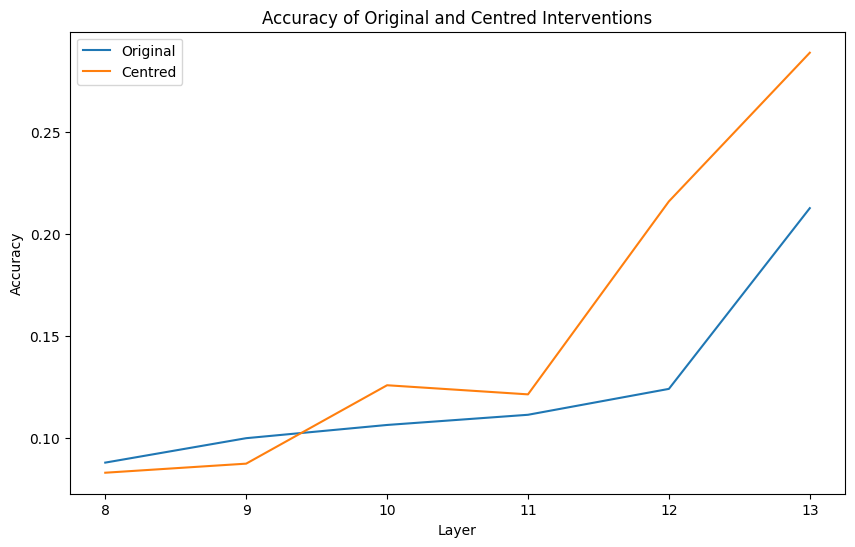

In [72]:
# Plot the results as two line graphs
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(layers, list(all_means['mean']['original'][layer] for layer in layers), label='Original')
plt.plot(layers, list(all_means['mean']['centred'][layer] for layer in layers), label='Centred')
plt.xlabel('Layer')
plt.ylabel('Accuracy')
plt.title('Accuracy of Original and Centred Interventions')
plt.legend()
plt.show()

In [ ]:
# Should repeat this experiment for more layers past 13!!
# Should also see if we can find trends across tasks (maybe not a priority)

# Repeating for llama

In [78]:
all_means_llama = {task: {'original': {}, 'centred': {}} for task in tasks}

In [73]:
def load_files_with_path(root_dir, folder_name):
    results_dict = {}

    # Walking through the directory structure
    for root, dirs, files in os.walk(root_dir):
        # Check if 'gptj-final' is in the path
        # Split root, get the last element, and check if it is 'gptj-final'
        root_split = root.split('/')[-1]
        print(root_split)
        if folder_name != root_split:
            continue
    
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                x = root.split('/')[-2]  # Extract 'x' from the path
                y = os.path.splitext(file)[0]  # Extract 'y' from the file name
                # Extract number from 'y'
                y = y.split('_')[-1]

                # Load JSON data
                with open(file_path, 'r') as json_file:
                    data = json.load(json_file)

                # Adding to dictionary
                if x not in results_dict:
                    results_dict[x] = {}
                results_dict[x][y] = data

    return results_dict

loaded_data_llama = load_files_with_path("results/", "llama7B")
loaded_data_llama # Displaying the loaded data structure




antonym
22_11_2023_15_55_27
28_11_2023_16_45_14
28_11_2023_16_51_40
28_11_2023_16_59_44
28_11_2023_17_14_08
28_11_2023_18_30_44
gptj-final
28_11_2023_21_02_39
gptj-final2
29_11_2023_00_06_27
gptj-final3
llama7B
capitalize
28_11_2023_18_48_22
gptj-final
gptj-final2
gptj-final3
llama7B
cosine-sims
present-past
21_11_2023_13_39_58
21_11_2023_13_54_30
21_11_2023_14_01_50
21_11_2023_14_07_28
21_11_2023_14_14_49
28_11_2023_19_37_49
gptj-final
gptj-final2
gptj-final3
llama7B
singular-plural
21_11_2023_13_30_48
28_11_2023_19_43_55
gptj-final
gptj-final2
gptj-final3
llama7B
country-capital
28_11_2023_18_58_02
gptj-final
gptj-final2
gptj-final3
llama7B
english-french
28_11_2023_19_04_18
gptj-final
gptj-final2
gptj-final3
llama7B


{'antonym': {'50028': {'7': {'original': {'clean_topk': [[1, 0.0],
      [2, 0.0],
      [3, 0.0]],
     'clean_rank_list': [202,
      364,
      289,
      30,
      295,
      2012,
      543,
      1180,
      190,
      167,
      1224,
      930,
      230,
      93,
      4,
      404,
      37,
      76,
      95,
      589,
      55,
      52,
      1185,
      910,
      32,
      39,
      257,
      2301,
      17,
      133,
      426,
      93,
      1569,
      54,
      147,
      702,
      114,
      360,
      83,
      605,
      3141,
      368,
      941,
      562,
      77,
      1784,
      37,
      151,
      83,
      91,
      51,
      1654,
      240,
      222,
      26,
      2080,
      268,
      695,
      1671,
      218,
      121,
      223,
      170,
      22,
      280,
      136,
      438,
      49,
      363,
      67,
      481,
      154,
      123,
      20,
      72,
      45,
      16,
      81,
      28,
      369,
      9,
      186,


In [75]:
original_accuracies_llama = {task: {} for task in loaded_data_llama.keys()}
new_accuracies_llama = {task: {} for task in loaded_data_llama.keys()}

for task in loaded_data_llama.keys():
    for seed in loaded_data_llama[task].keys():
        original_accuracies_llama[task][seed] = {}
        new_accuracies_llama[task][seed] = {}
        for layer in loaded_data_llama[task][seed].keys():
            original_accuracies_llama[task][seed][layer] = loaded_data_llama[task][seed][layer]['original']['intervention_topk'][0][1]
            new_accuracies_llama[task][seed][layer] = loaded_data_llama[task][seed][layer]['centred']['intervention_topk'][0][1]


In [76]:
original_accuracies_llama

{'antonym': {'50028': {'7': 0.012698412698412698,
   '8': 0.03492063492063492,
   '9': 0.050793650793650794,
   '10': 0.047619047619047616,
   '11': 0.12380952380952381,
   '12': 0.2920634920634921},
  '65751': {'7': 0.015432098765432098,
   '8': 0.024691358024691357,
   '9': 0.06481481481481481,
   '10': 0.04938271604938271,
   '11': 0.09876543209876543,
   '12': 0.30246913580246915},
  '50981': {'7': 0.022435897435897436,
   '8': 0.041666666666666664,
   '9': 0.0641025641025641,
   '10': 0.0641025641025641,
   '11': 0.13141025641025642,
   '12': 0.2980769230769231},
  '97560': {'7': 0.008797653958944282,
   '8': 0.02932551319648094,
   '9': 0.05571847507331378,
   '10': 0.03812316715542522,
   '11': 0.10557184750733138,
   '12': 0.2991202346041056},
  '55859': {'7': 0.011799410029498525,
   '8': 0.035398230088495575,
   '9': 0.06489675516224189,
   '10': 0.05014749262536873,
   '11': 0.12684365781710916,
   '12': 0.30383480825958703}},
 'capitalize': {'51791': {'7': 0.023529411764705

In [77]:
new_accuracies_llama

{'antonym': {'50028': {'7': 0.006349206349206349,
   '8': 0.015873015873015872,
   '9': 0.044444444444444446,
   '10': 0.015873015873015872,
   '11': 0.05714285714285714,
   '12': 0.13015873015873017},
  '65751': {'7': 0.012345679012345678,
   '8': 0.021604938271604937,
   '9': 0.040123456790123455,
   '10': 0.018518518518518517,
   '11': 0.06790123456790123,
   '12': 0.13271604938271606},
  '50981': {'7': 0.016025641025641024,
   '8': 0.035256410256410256,
   '9': 0.0641025641025641,
   '10': 0.02564102564102564,
   '11': 0.08012820512820513,
   '12': 0.13782051282051283},
  '97560': {'7': 0.005865102639296188,
   '8': 0.008797653958944282,
   '9': 0.03519061583577713,
   '10': 0.011730205278592375,
   '11': 0.06451612903225806,
   '12': 0.12609970674486803},
  '55859': {'7': 0.0058997050147492625,
   '8': 0.02064896755162242,
   '9': 0.04129793510324484,
   '10': 0.014749262536873156,
   '11': 0.06784660766961652,
   '12': 0.13864306784660768}},
 'capitalize': {'51791': {'7': 0.0,
  

In [81]:
import numpy as np
# add means to each
for task in tasks:
    for layer in ['8', '9', '10', '11', '12']:
        # Find all the seeds for the layer
        # print(original_accuracies_llama[task].keys())
        seeds = list(original_accuracies_llama[task].keys())
        # Find the mean for the layer
        all_means_llama[task]['original'][layer] = np.mean(list(original_accuracies_llama[task][seed][layer] for seed in seeds))
        all_means_llama[task]['centred'][layer] = np.mean(list(new_accuracies_llama[task][seed][layer] for seed in seeds))

In [83]:
# Calculate means across all tasks for each layer
layers_llama = ['8', '9', '10', '11', '12']
tasks = ['antonym', 'capitalize', 'country-capital', 'english-french', 'present-past', 'singular-plural']
all_means_llama['mean'] = {'original': {x: {} for x in layers_llama}, 'centred': {x: {} for x in layers_llama}}
for layer in layers_llama:
    all_means_llama['mean']['original'][layer] = np.mean(list(all_means_llama[task]['original'][layer] for task in tasks))
    all_means_llama['mean']['centred'][layer] = np.mean(list(all_means_llama[task]['centred'][layer] for task in tasks))

In [84]:
all_means_llama['mean']['original']

{'8': 0.18029489909938676,
 '9': 0.1872115491592734,
 '10': 0.1877526544187513,
 '11': 0.23659411100673236,
 '12': 0.35801667139776655}

In [85]:
all_means_llama['mean']['centred']

{'8': 0.17730613053177935,
 '9': 0.18173880815556465,
 '10': 0.17566215861317125,
 '11': 0.19213792485526437,
 '12': 0.2160722971939557}

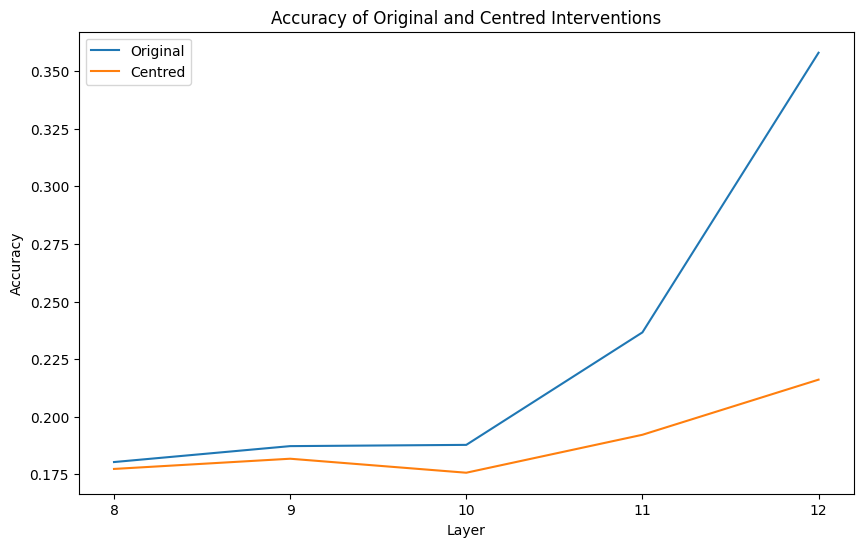

In [88]:
# Plot the results as two line graphs
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(layers_llama, list(all_means_llama['mean']['original'][layer] for layer in layers_llama), label='Original')
plt.plot(layers_llama, list(all_means_llama['mean']['centred'][layer] for layer in layers_llama), label='Centred')
plt.xlabel('Layer')
plt.ylabel('Accuracy')
plt.title('Accuracy of Original and Centred Interventions')
plt.legend()
plt.show()

In [ ]:
# Should repeat this experiment for more layers past 13!!
# Should also see if we can find trends across tasks (maybe not a priority)